# Departamento de marketing do banco

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



## Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
creditcard_df = pd.read_csv('/content/gdrive/MyDrive/IA MachineLearning DataSciense/Marketing/MarketingData.csv')

In [ ]:
creditcard_df.shape

(8950, 18)

In [ ]:
creditcard_df.head()
#BALANCE = saldo para fazer compra
#balance_frequency = frequencia que o saldo é atualizado: 1->atualiza o saldo com frequencia, 0-> não atualiza o saldo com frequencia
#se não tem dinheiro na conta corrente, faz compra com cartão de crédito
#PURCHASES = quantas compras fez  
#ONEOFF_PURCHASES = quantidade de compras feito de uma só vez,(sem parcelar) 
#INSTALLMENTS_PURCHASES = compra parcelada
#CASH_ADVANCE = dinheiro adiantado do cartão de crédito
#PURCHASES_FREQUENCY = frequencia de compras: mais próximo de 1, mas frequente a compra
#ONEOFF_PURCHASES_FREQUENCY = frequencia de saques de dinheiro adiantado
#ONEOFF_PURCHASES_FREQUENCY = frequencia de compras a vista
#PURCHASES_INSTALLMENTS_FREQUENCY = frequencia de compras parceladas
#CASH_ADVANCE_FREQUENCY = frequencia que a pessoa retira dinheiro do limite do cartão de crédito
#CASH_ADVANCE_TRX	= quantas vezes adiantou o dinheiro, ou seja, quantas vezes precisou retirar dinheiro do limite do cartão de crétido
#PURCHASES_TRX = números de compras, daquela compra
#CREDIT_LIMIT = limite do cartão de crédito
#PAYMENTS = valor pago
#MINIMUM_PAYMENTS = valor mínimo pago da compra
#PRC_FULL_PAYMENT = 0-> paga tota a fatura, 
#TENURE = quanto tempo é  cliente

#se o ONEOFF_PURCHASES tem valor, indica que a compra foi à vista
#são 18 característica que um cliente possui

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
len(np.unique(creditcard_df['CUST_ID'])) == creditcard_df.shape[0]
#indica e comprova que cada linha é um cliente, não há repetição

True

In [ ]:
creditcard_df.info()
#não tem nenhum valor nulo(non-null)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()
#PRC_FULL_PAYMENT = média de apenas 15% pagam a fatura total, ou seja, pode ser que 85% estejam endividados

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]
#cliente que fez o maior valor de compra à vista

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
#cliente que saca o maior valor do cartão de crédito
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [ ]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Visualização e exploração dos dados

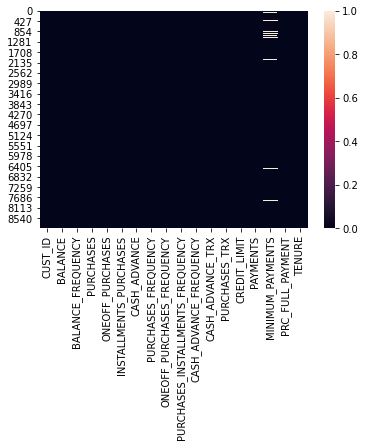

In [ ]:
sns.heatmap(creditcard_df.isnull());

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050814

In [ ]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [ ]:
#FILTRO: pega o credit limit onde o minimum_payments.isnull() é false
#creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == False), 'CREDIT_LIMIT']

In [ ]:
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364622

In [ ]:
#quando tiver valor nulo no limite de crétido, troca pela média de toda a coluna do cartão de crétido
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

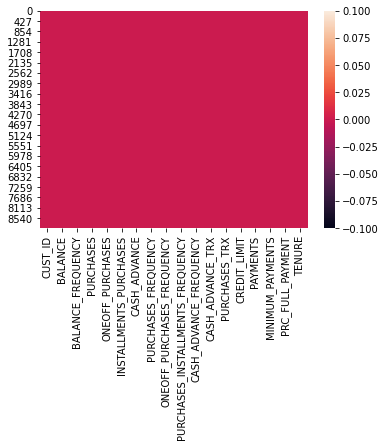

In [ ]:
sns.heatmap(creditcard_df.isnull());

In [ ]:
creditcard_df.duplicated().sum()

0

In [ ]:
#remove o id do cliente, pois não será necessário
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [ ]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
len(creditcard_df.columns)

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

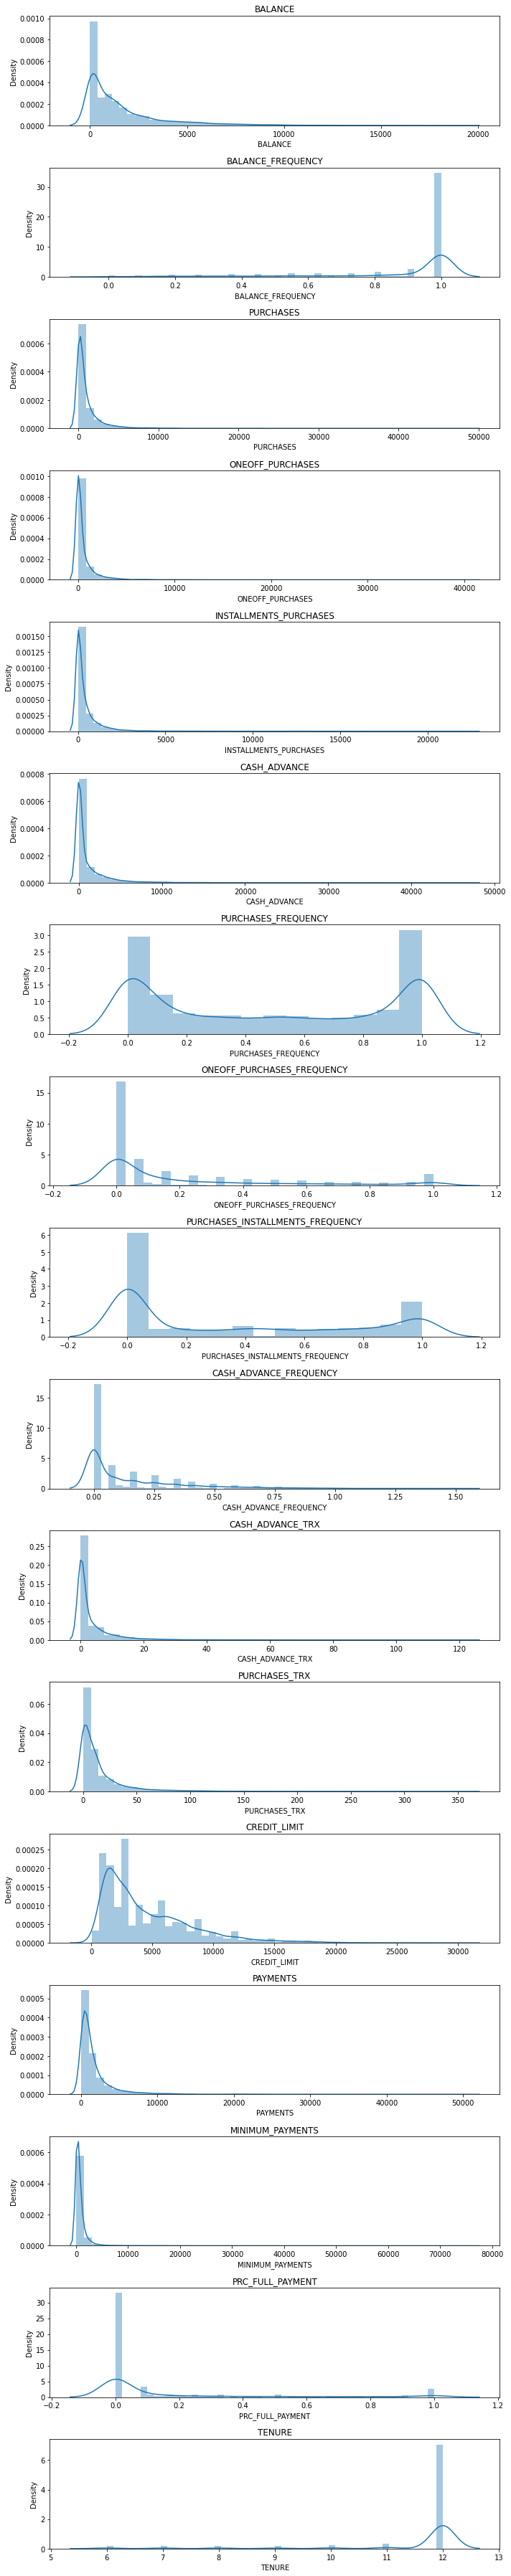

In [ ]:
#faz um subplot para cada coluna do dataframe
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i + 1) #17 linhas, uma coluna, id do gráfico
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True) #histograma e kde
  plt.title(creditcard_df.columns[i])
plt.tight_layout();

In [ ]:
correlations = creditcard_df.corr()

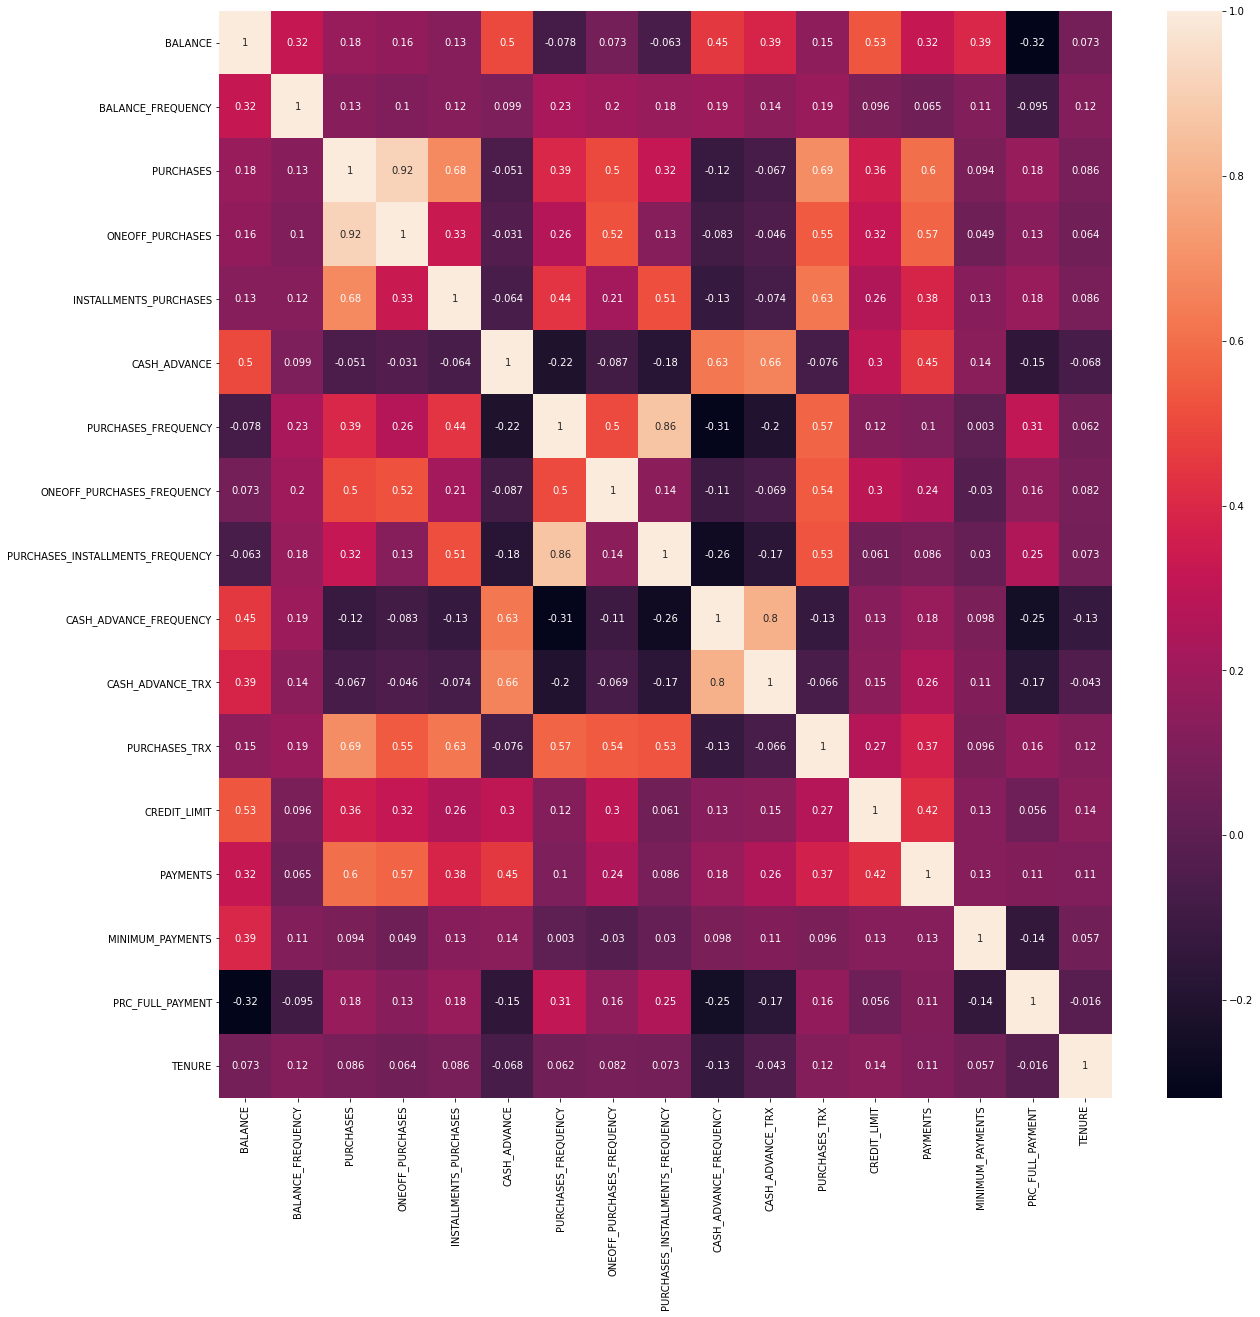

In [ ]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);
#maior parte das compras, estão relacionados com a compra à vista
#os maiores valores de compra estão relacionados a compra à vista
#limite de cartão de crédito não uma relação forte no valor total de compra que os clientes do banco fazem

## Definição do número de clusters usando o Elbow Method

- Mais detalhes 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
#saldo da conta corrente
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [ ]:
#coloca todos os dados em um mesmo padrão, pois o k-means, que será utilizado, ele fazerá cálculos de distância euclidiana
#e isso, se fizer com 0 e 19043.13856 terá resultados muito ruins, com escalas grandes. Dessa forma, coloca os dados na
#mesma escala
#MinMaxScaler = valores mínimos e máximos para colocar no mesmo padrão
#StandardScaler = padronização, média e desvio padrão -> bom para outliers
#retorna o valor escaloado para cada linha
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [ ]:
creditcard_df_scaled[0] #linha 0

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [ ]:
#valor para cada linha
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
#calcula o valor do WCSS, quanto menor melhor, achando o EBLOW METHOD, método do cotovelo
#calcula com vários WCSS, a fim de achar o melhor número de cluster
#WCSS = soma da distância dos clusters. Quanto menor, melhor
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i) #cria o objeto com o KMeans, indicando o número de clusters
  kmeans.fit(creditcard_df_scaled) #faz o treinamento, calculando
  wcss_1.append(kmeans.inertia_) #para cada WCSS, ou seja, a soma das distância de cluster, adiciona na lista
                #kmeans.inertia_ = número do wcss 

In [ ]:
print(wcss_1)

[152150.00000000003, 127784.85291377666, 111986.89546457039, 99073.93826774822, 91502.92043249558, 84851.13240432598, 79528.56855448855, 74864.21104909411, 71100.7041976719, 66483.65460924822, 63635.55149190037, 61353.56095089195, 59169.194856259695, 57493.46523914011, 55891.39852611254, 54500.65891105346, 53029.09673438581, 51641.79630770374, 50824.54312459804]


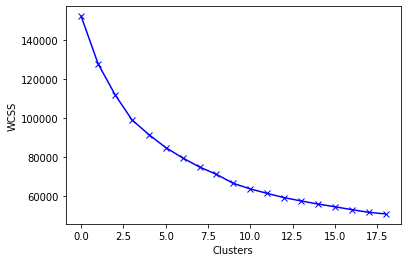

In [ ]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

## Agrupamento com k-means

In [ ]:
#foi decidido fazer com  8 clusters
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
#labels = grupo para cada um dos clientes
#0 = cluster 0 para o cliente de índice x
#1 = cluster 1 para o cliente de índice y
labels, len(labels)

(array([5, 1, 6, ..., 7, 7, 7], dtype=int32), 8950)

In [ ]:
np.unique(labels, return_counts=True)
#grupo0: 2015 clientes
#grupo1: 889 clientes
#grupo2: 23 clientes

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([2015,  889,   23, 1183,  327, 2762, 1125,  626]))

In [ ]:
#centroides de cada grupo média de cada atributo dentro do cluster
#7 vetores: atributo médio de cada um dos clusters:
#vetor 0: [-3.61685928e-01,  3.31481301e-01, -3.03257864e-02, -> -3.6168 = média do saldo da conta corrente para o cluster 0
kmeans.cluster_centers_

array([[-3.61685928e-01,  3.31481301e-01, -3.03257864e-02,
        -2.40392687e-01,  3.69743022e-01, -3.61558335e-01,
         9.95614708e-01, -3.79984090e-01,  1.20644261e+00,
        -4.71282956e-01, -3.59117292e-01,  1.94051786e-01,
        -2.60447354e-01, -2.12927996e-01, -5.09416579e-02,
         3.15555316e-01,  2.55413425e-01],
       [ 1.65985362e+00,  3.95845153e-01, -2.22079399e-01,
        -1.57354267e-01, -2.36082140e-01,  1.98728499e+00,
        -4.84518914e-01, -2.11175077e-01, -4.25722459e-01,
         1.91731860e+00,  1.91345352e+00, -2.71572704e-01,
         1.00523763e+00,  7.91087622e-01,  5.01347682e-01,
        -3.95601647e-01,  7.43770226e-02],
       [ 1.86590651e+00,  3.32878117e-01,  1.25968437e+01,
         1.31111821e+01,  5.69638874e+00, -4.17760945e-03,
         1.03332159e+00,  2.17063444e+00,  8.66220718e-01,
        -4.76183389e-01, -2.14853617e-01,  4.56655817e+00,
         3.17419740e+00,  8.99113558e+00,  1.06481726e+00,
         1.23631700e+00,  2.9

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.361686,0.331481,-0.030326,-0.240393,0.369743,-0.361558,0.995615,-0.379984,1.206443,-0.471283,-0.359117,0.194052,-0.260447,-0.212928,-0.050942,0.315555,0.255413
1,1.659854,0.395845,-0.222079,-0.157354,-0.236082,1.987285,-0.484519,-0.211175,-0.425722,1.917319,1.913454,-0.271573,1.005238,0.791088,0.501348,-0.395602,0.074377
2,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
3,-0.700759,-2.140309,-0.309715,-0.234214,-0.301910,-0.320376,-0.553668,-0.440610,-0.439313,-0.521412,-0.376356,-0.418458,-0.173339,-0.191541,-0.256694,0.286055,0.202767
4,1.110263,0.475718,2.571220,1.837775,2.703405,-0.125136,1.170408,1.551592,1.294742,-0.265418,-0.124742,3.223166,1.330785,1.513267,0.809454,0.237560,0.335543
5,0.007008,0.403734,-0.354201,-0.238705,-0.398851,-0.104332,-0.840919,-0.382533,-0.751003,0.087079,-0.039700,-0.477484,-0.307208,-0.253251,-0.008268,-0.455566,0.273533
6,-0.119916,0.402597,0.580482,0.704295,0.078431,-0.332989,0.998230,1.914630,0.212651,-0.422462,-0.336574,0.665146,0.469246,0.173099,-0.156051,0.463739,0.274920
7,-0.334901,-0.349885,-0.287298,-0.212974,-0.287679,0.068020,-0.203948,-0.284236,-0.227466,0.307808,-0.000179,-0.387812,-0.562209,-0.391666,-0.208921,0.012748,-3.197669


- Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863 dólar) 

In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers) #transforma para números mais reais, pelo algoritmo, de cada cluster em relação a cada coluna/característica
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,811.656098,0.955796,938.413323,193.434747,745.421672,220.666395,0.889939,0.089101,0.843908,0.040836,0.798115,19.533234,3546.835418,1116.738167,745.489157,0.246009,11.859127
1,5019.320038,0.971043,528.728775,331.261517,197.581494,5146.300575,0.295890,0.139460,0.195244,0.518819,16.306742,7.959551,8151.915220,4023.265005,2032.576168,0.038008,11.616854
2,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
3,105.905016,0.370251,341.493787,203.690778,138.053897,307.026813,0.268137,0.071015,0.189843,0.030804,0.680473,4.308538,3863.769606,1178.650289,265.993165,0.237381,11.788673
4,3875.394281,0.989964,6496.656972,3642.768196,2855.723639,716.455532,0.960092,0.665328,0.879001,0.082031,2.397554,94.825688,9336.391437,6113.904331,2750.604313,0.223197,11.966361
5,1579.060896,0.972912,246.448453,196.236465,50.391228,760.081351,0.152849,0.088341,0.065970,0.152570,2.977907,2.841362,3376.699264,1000.007089,844.937864,0.020469,11.883376
6,1314.879752,0.972642,2243.414511,1761.422598,481.991913,280.576637,0.890989,0.773629,0.448950,0.050605,0.951957,31.242883,6201.759139,2234.247475,500.535333,0.289350,11.885231
7,867.405752,0.794386,389.387444,238.943722,150.922955,1121.512020,0.408496,0.117664,0.274036,0.196740,3.247604,5.070288,2448.904871,599.308188,377.324957,0.157443,7.238019


Grupo 2 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

Grupo 1: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5019.320038) e sacam muito dinheiro do cartão de crédito (5146.300575), compram pouco (0.295890) e usam bastante o limite do cartão para saques (0.518819). Pagam muito pouco a fatura completa (0.03)

Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863 dólar)

In [ ]:
labels, len(labels)

(array([5, 1, 6, ..., 7, 7, 7], dtype=int32), 8950)

In [ ]:
#cria um novo dataframe, concatenando os dados originais com o número de cluster
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


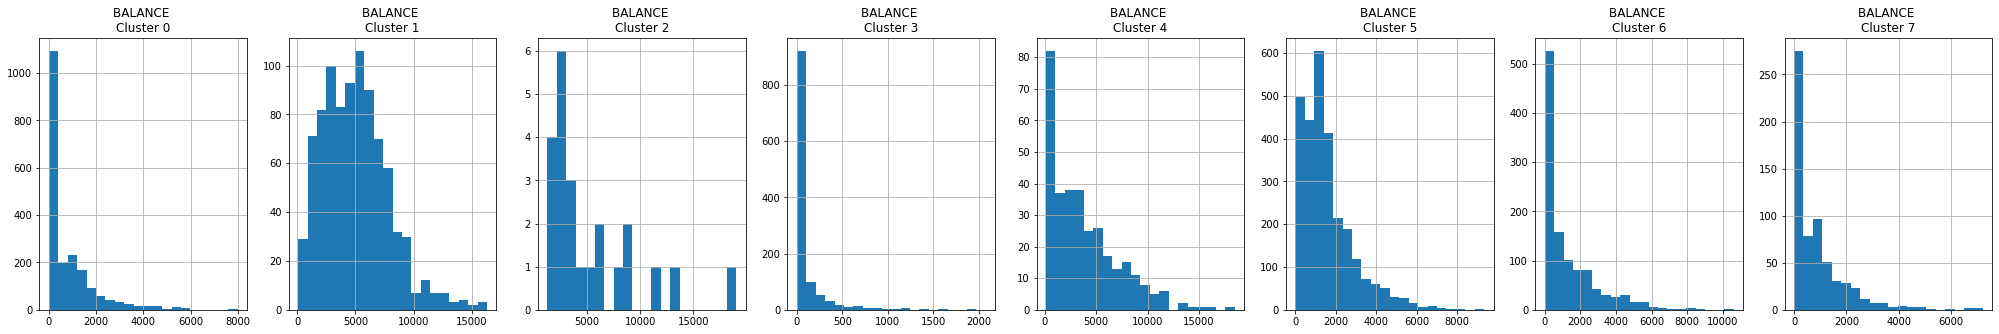

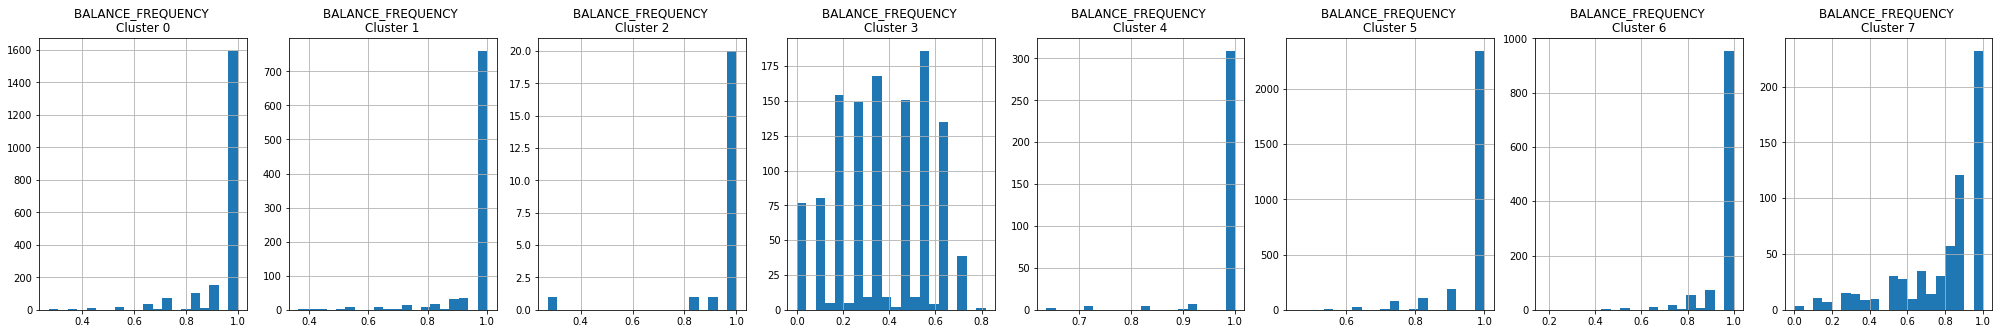

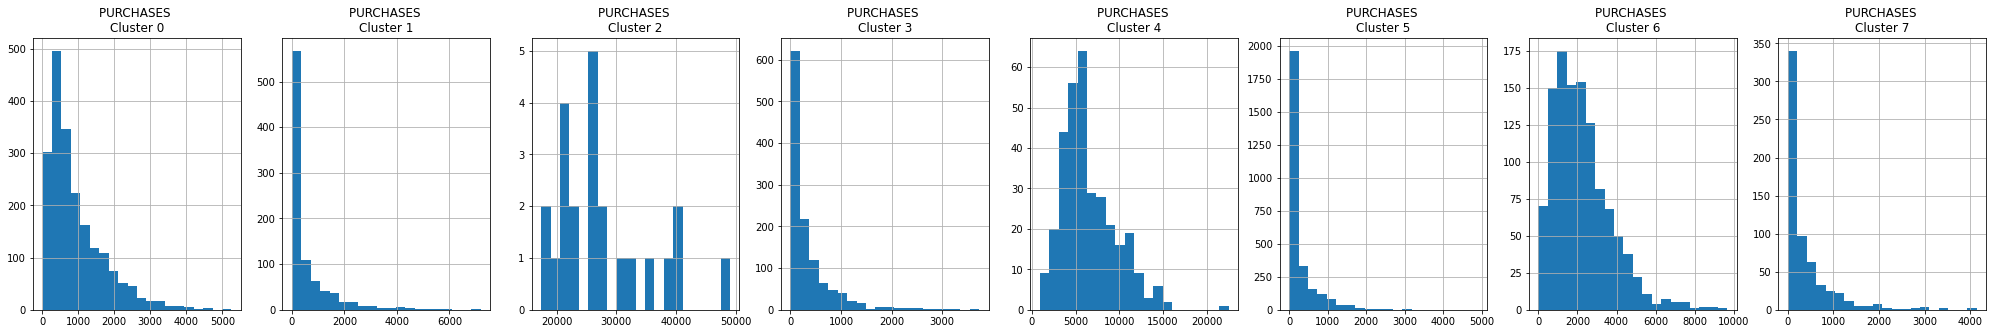

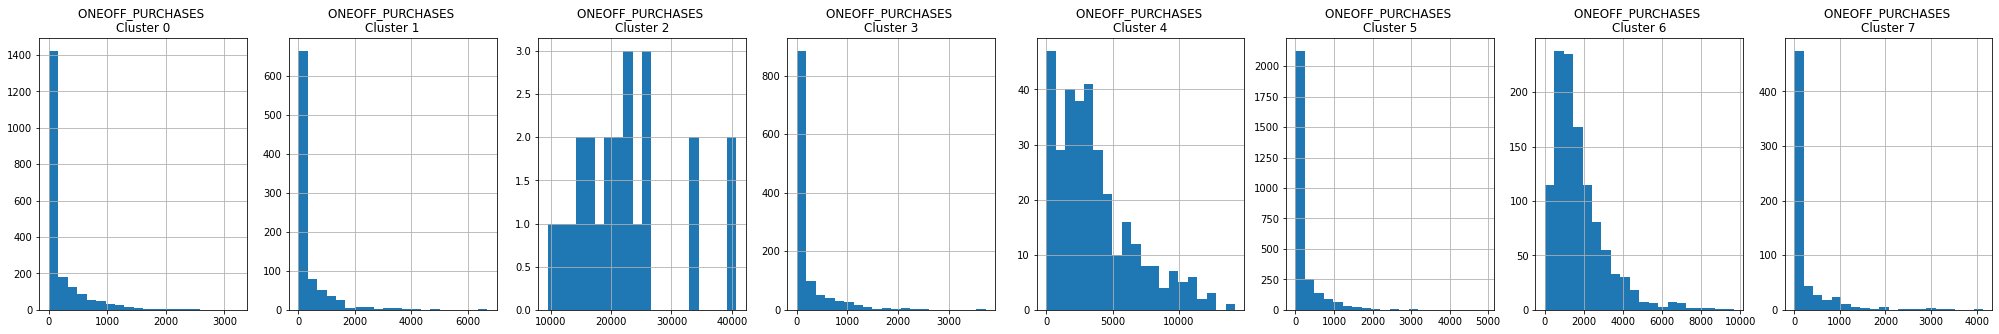

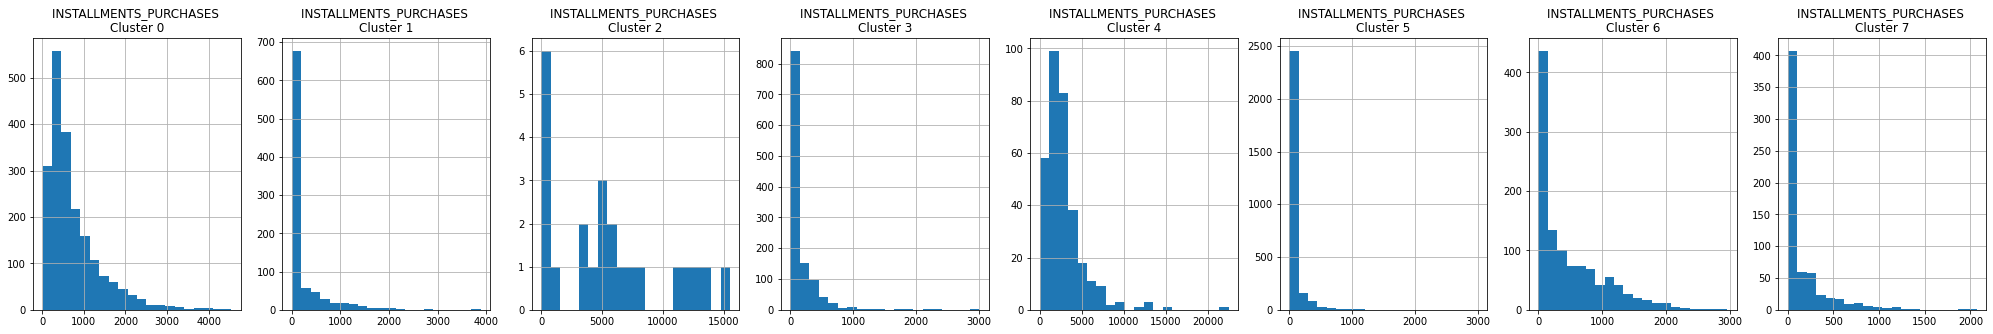

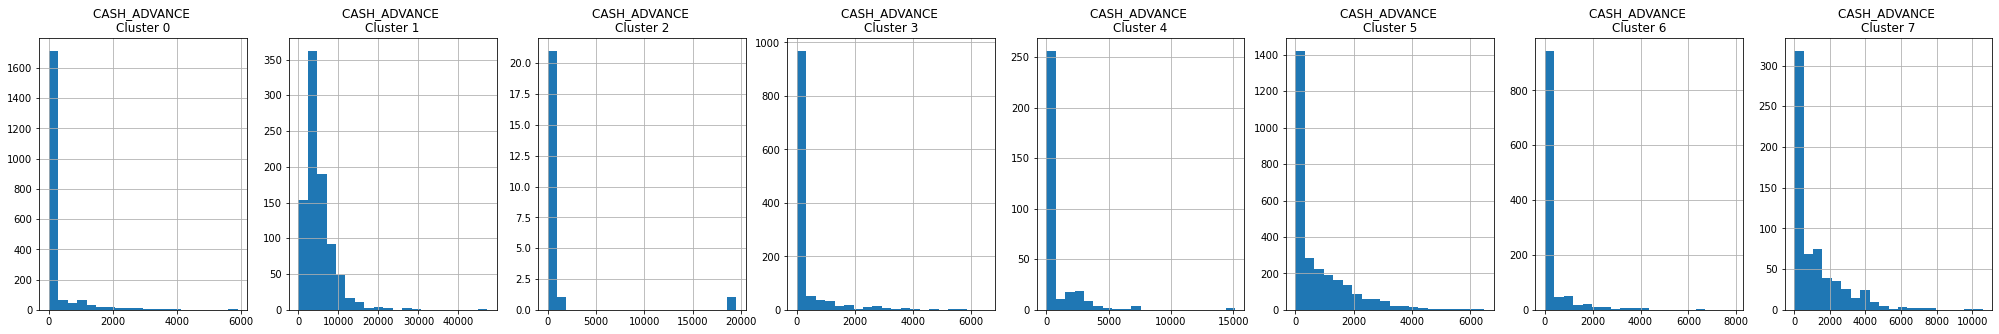

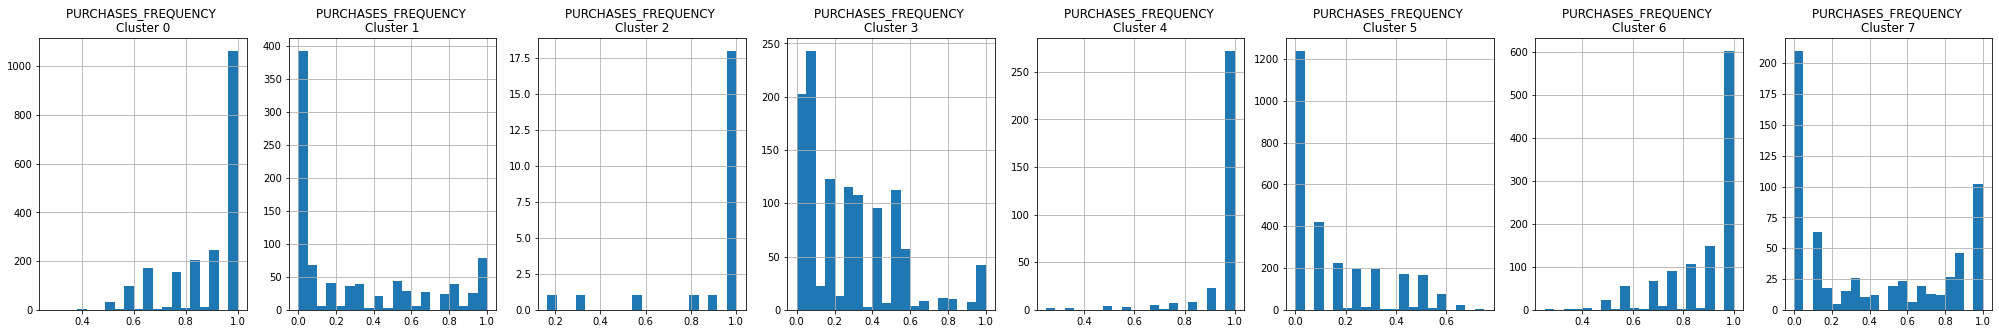

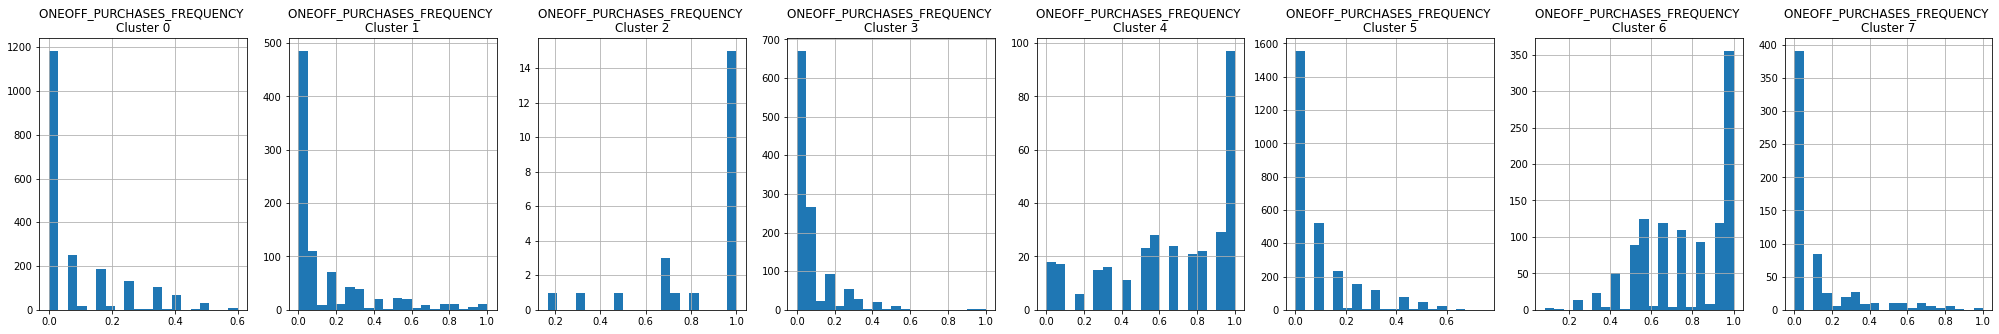

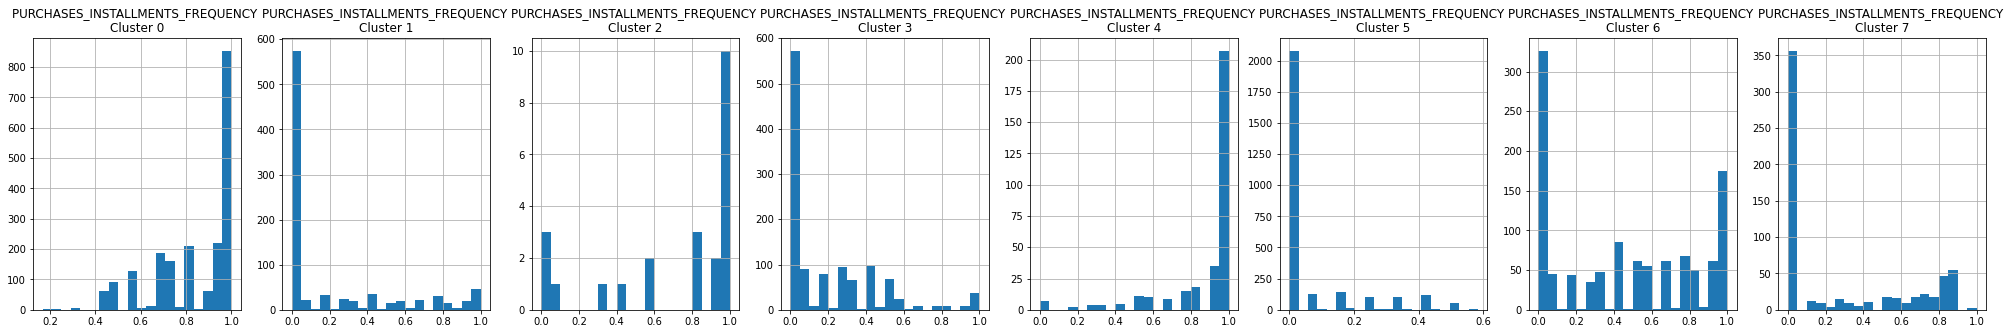

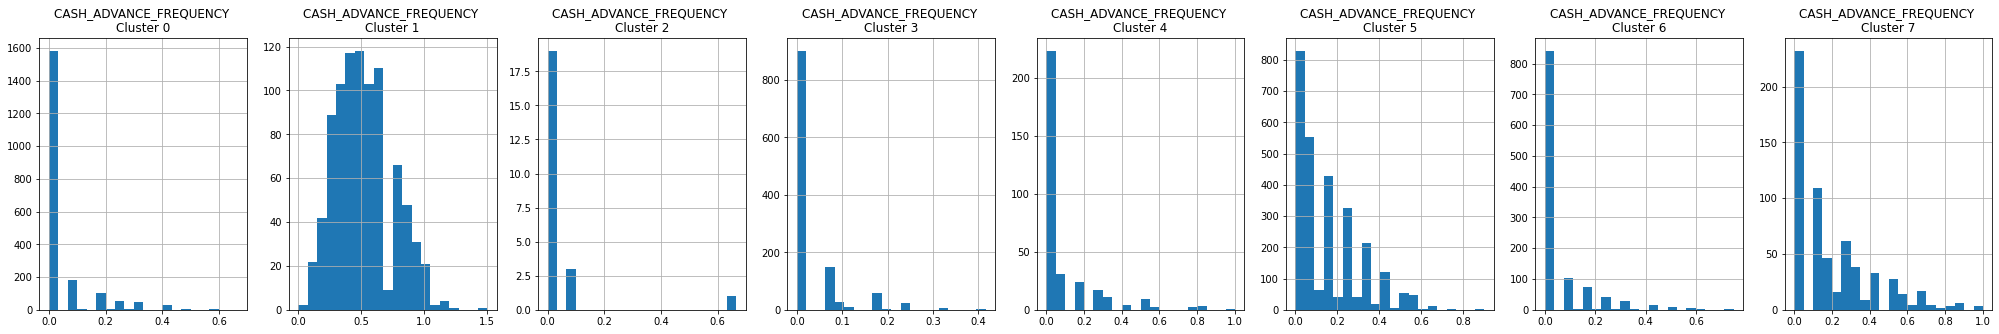

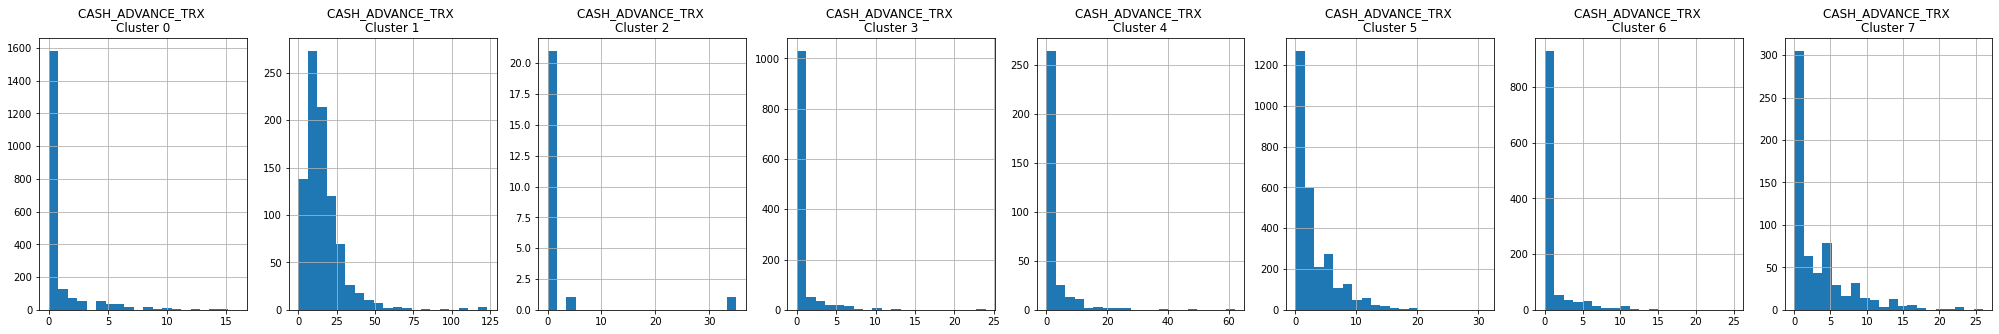

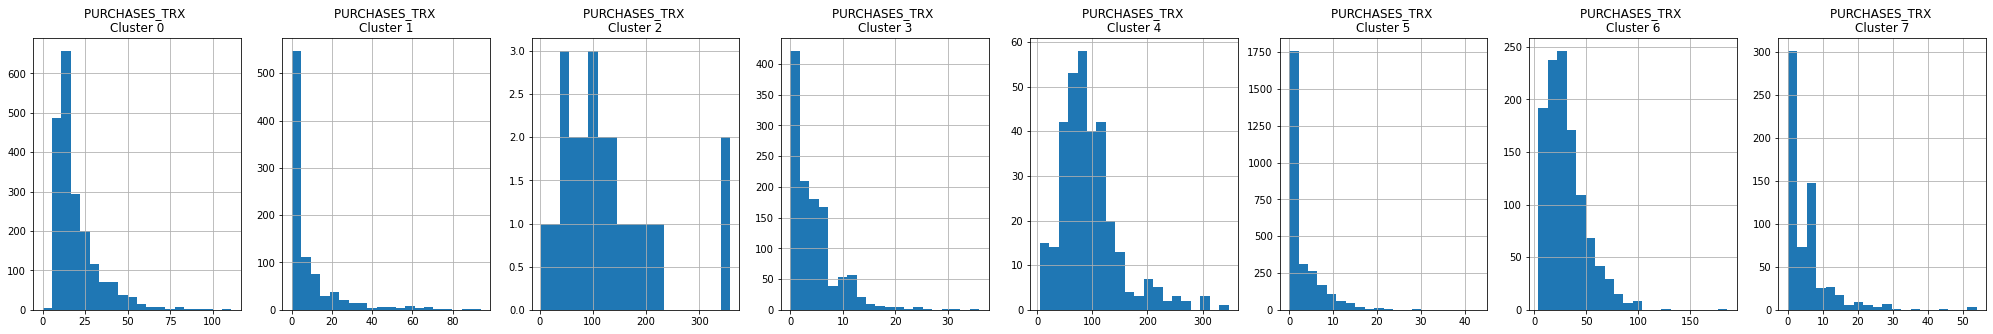

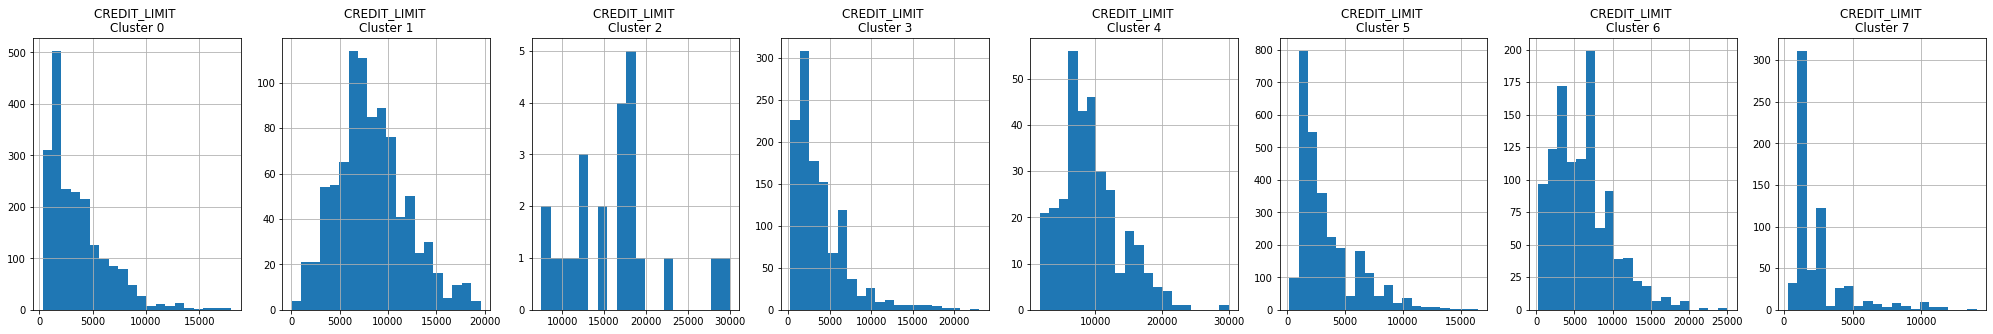

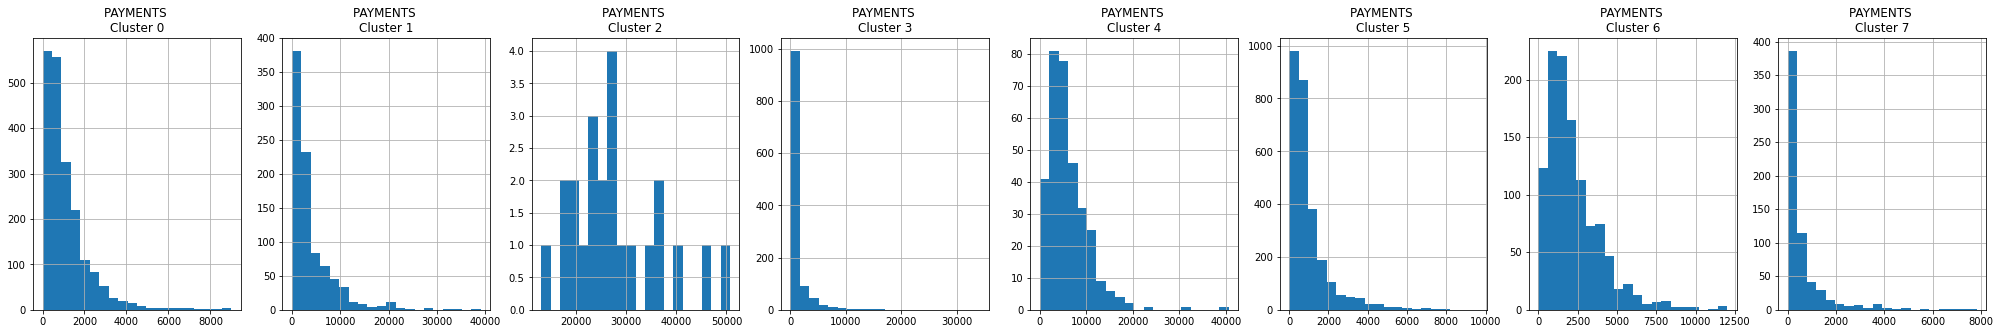

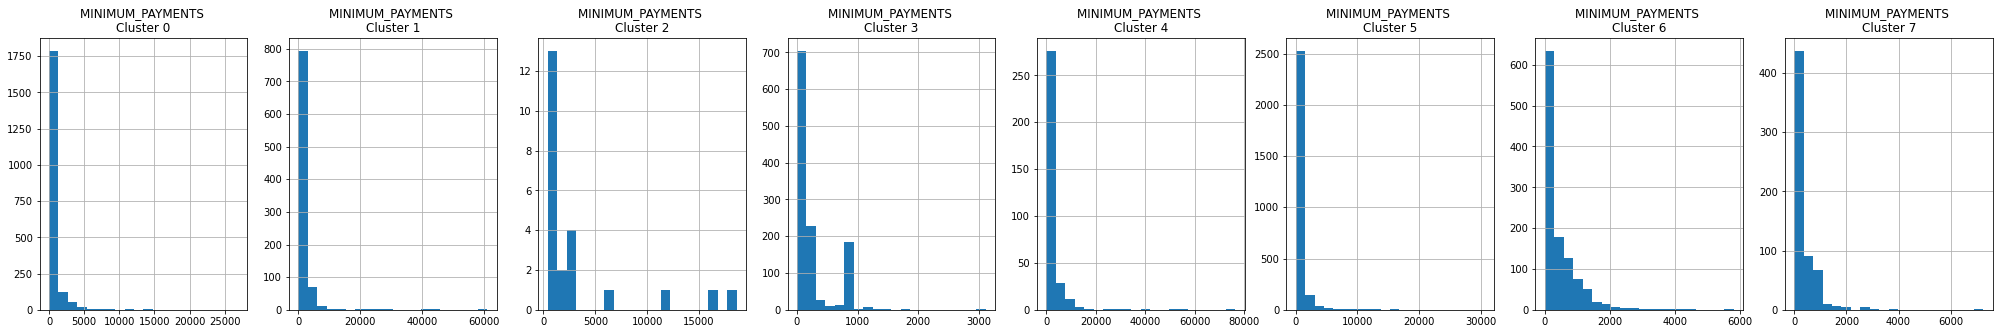

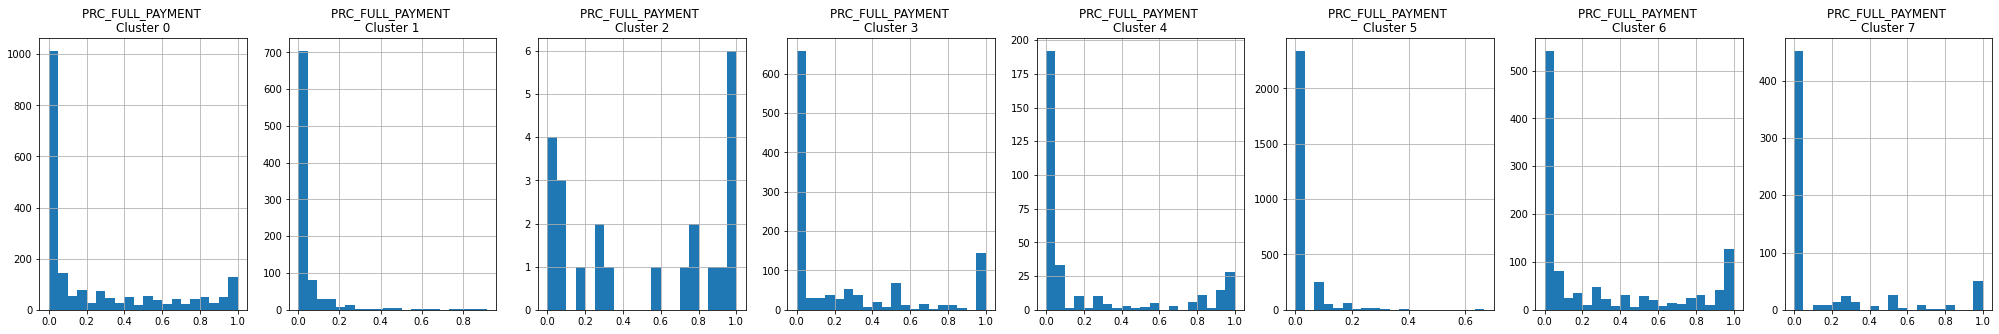

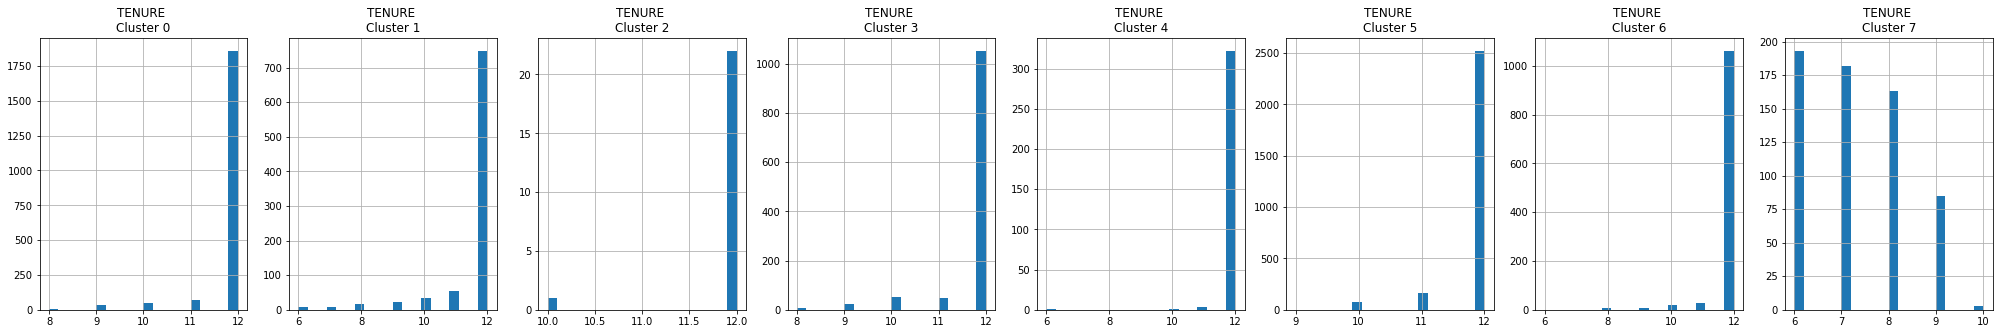

In [ ]:
#gera histograma pra cada um dos clusters de cada coluna da tabela
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [ ]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
7196,509.685823,1.000000,457.68,0.0,457.68,0.0,1.000000,0.000000,1.000000,0.0,0,24,4000.0,157.893758,227.507164,0.000000,12,0
7691,16.727286,0.888889,174.46,0.0,174.46,0.0,0.888889,0.000000,0.666667,0.0,0,8,1500.0,142.694823,116.628448,0.333333,9,0
7690,50.926002,1.000000,165.97,0.0,165.97,0.0,0.583333,0.000000,0.500000,0.0,0,7,1500.0,119.245830,332.440855,0.000000,12,0
7689,162.580388,1.000000,1403.42,153.5,1249.92,0.0,1.000000,0.166667,0.916667,0.0,0,16,2500.0,1045.177657,163.608183,0.100000,12,0
7687,33.585586,1.000000,298.20,0.0,298.20,0.0,1.000000,0.000000,1.000000,0.0,0,12,4000.0,299.548557,171.520002,1.000000,12,0


In [ ]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6370,2300.825677,0.875000,522.06,0.00,522.06,2809.026116,0.875000,0.000000,0.750000,0.125000,1,7,3000.0,469.928446,1711.018102,0.0,8,7
8275,219.709329,1.000000,586.64,0.00,586.64,0.000000,1.000000,0.000000,0.875000,0.000000,0,8,1000.0,156.939833,165.553894,0.0,8,7
6365,4.686854,0.428571,28.80,0.00,28.80,0.000000,0.428571,0.000000,0.285714,0.000000,0,3,1500.0,34.401591,60.436139,1.0,7,7
5901,2610.433432,1.000000,512.50,0.00,512.50,2771.850961,1.000000,0.000000,0.857143,0.142857,6,11,3000.0,691.600531,741.985756,0.0,7,7
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,7


In [ ]:
credit_ordered.to_csv('/content/gdrive/MyDrive/IA MachineLearning DataSciense/Marketing/cluster1.csv')

## Aplicação de PCA (principal component analysis) e visualização dos resultados

PCA: não supervisionado
Redução de dimensionalidade: se há 3 dimensões, é feito um 
cálculo para reduzir para 2 dimensões. Tenta manter as mesmas características

Os componenetes são criadas com as características não-correlacionadas. Mantém a característica

Se, na matriz de correlação tiver uma relação forte, o PCA irá unir esses dois para que se tenha um atributo só

OU SEJA, se há uma correlação forte, JUNTA, ex: 0.86
        se não há uma correlação forte, mantém elas, ou seja, o PCA prioriza características que não estão correlacionadas, ex: 0.2


In [ ]:
pca = PCA(n_components=2) #numéro de componentes irá gerar. Como o objeto é gerar um gráfico, pega as 18 características inicias
#e transforma em apenas 2  
principal_comp = pca.fit_transform(creditcard_df_scaled) #dados originais
principal_comp

array([-1.68221994, -1.07645036])

In [ ]:
#aquelas 18 características da tabela, agora serão apenas 2
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076450
1,-1.138287,2.506460
2,0.969682,-0.383514
3,-0.873631,0.043178
4,-1.599433,-0.688584


In [ ]:
pca_df.shape

(8950, 2)

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076450,5
1,-1.138287,2.506460,1
2,0.969682,-0.383514,6
3,-0.873631,0.043178,5
4,-1.599433,-0.688584,5


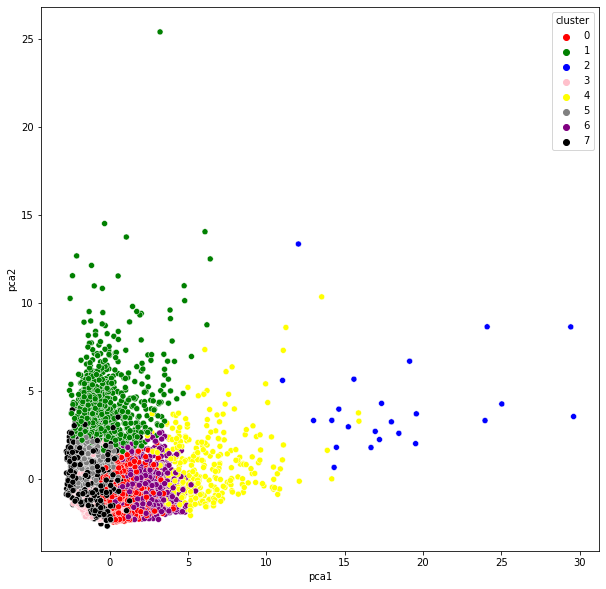

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

## Aplicação de autoencoders

Tipo de rede neural para codificar dados

Utiliza a mesma entrada e saída para comprar resultados

Comprime a informação no meio da rede neural

Funciona se exister uma correlação entre os dados. 
Se não tiver, terá resutlador ruins

PCA ou AUTOENCODERS = são concorrentes, pode usar qualquer um ou os dois juntos

Abordar mais técnicas computacionais, pode melhorar os resultados

In [ ]:
# 18 atributos -> 10 atributos
# Elbow = quantos clusters
# K-means = novos grupos
# PCA = aplica o PCA

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
# 17 entrada-> 500 neuronios-> 2000 neuronios -> 10 neuronio que armazena a info codificada -> 2000 -> 500  decodificação-> 17
#17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
#cria todas as camadas
#como tem poucos dados, é legal aumentar os neurônios posteriores
# Dense: cada neuronio de uma camada está ligado com todos os neuronios da próximo camada


input_df = Input(shape=(17,)) #inicia com 17 neuronios de entrada, pois são as 17 colunas
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [ ]:
#processo completo: início, codificação até os 10 neurônios e fazer a decodificação
# autoencoder
autoencoder = Model(input_df, decoded) #camada inicial e final

In [ ]:
#somento o encoder: armazena somente a codificação dos dados, imagens, nos 10 neuronios(encoded)
# encoder
encoder = Model(input_df, encoded)

In [ ]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')
#optimizer = ajustes dos pesos -> mais utilizado
#loos = erro -> mean_squared_error = erro ao quadrado: se no início é 100 e chegou ao final com 300, significa que o erro é de 200, ao quadrado

In [ ]:
#efetiva o treinamento
#autoencoder.fit(x,x) = compara a entrada com a própria entrada
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 6s 21ms/step - loss: 0.3407
Epoch 2/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0770
Epoch 3/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0543
Epoch 4/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0426
Epoch 5/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0371
Epoch 6/50
280/280 [==============================] - 6s 21ms/step - loss: 0.0524
Epoch 7/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0652
Epoch 8/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0702
Epoch 9/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0283
Epoch 10/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0500
Epoch 11/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0240
Epoch 12/50
280/280 [==============================] - 6s 20ms/step - loss: 0.0261
Epoch 13/50
2

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
#faz as previsões dos dados compactados, dentro dos 10 neurônios, não no final
#o encoder é um Model do meio do caminho, que já tem todos os pesos guardados até sua camada. Dessa forma, treinar o modelo
#total(autoencoder) já terá os pesos do encoder
compact = encoder.predict(creditcard_df_scaled)

In [ ]:
compact.shape

(8950, 10)

In [ ]:
creditcard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [ ]:
compact[0]

array([0.        , 1.290894  , 0.14081115, 0.05111908, 1.0585442 ,
       0.        , 1.1684169 , 0.7466399 , 0.04150242, 0.62293756],
      dtype=float32)

In [ ]:
#acha o wcss, depois de aplicar o autoencoder. Soma dos clusters
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

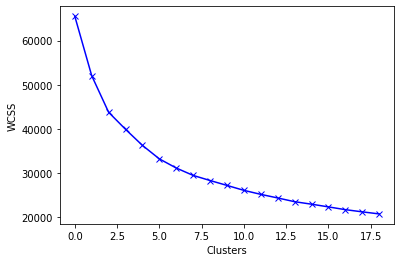

In [ ]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

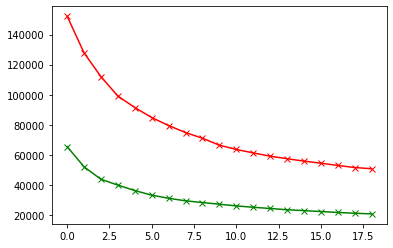

In [ ]:
plt.plot(wcss_1, 'bx-', color = 'r') #1º teste
plt.plot(wcss_2, 'bx-', color = 'g'); #autoencoder
#quando reduz a dimensionalidade, reduz o número de clusters

In [ ]:
#foi decidido fazer com 4 cluster com a base de dados compact = reduziu em 10 colunas das 17 que tinha e tem as predições: a 
#codificação dos valores de entradas de 17 colunas em 10 colunas. 10 colunas foi definido na rede neural encoder(do meio)
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
compact[0]

array([0.        , 1.290894  , 0.14081115, 0.05111908, 1.0585442 ,
       0.        , 1.1684169 , 0.7466399 , 0.04150242, 0.62293756],
      dtype=float32)

In [ ]:
labels = kmeans.labels_
labels, labels.shape
#id dos clusters = 0,1,2,3 : cada registro tem um cluster associado

(array([1, 0, 1, ..., 0, 0, 0], dtype=int32), (8950,))

In [ ]:
#dados originais com os clusters do treinamento com a base de dados do encoder(10colunas)(10neuronios)
#essa é outra técnicna de agrupamento, com menos clusters, pois foi aplicado a redução de dimensionalidade com o AUTOENCODER,
#que foi definido fazer com 4 clusters
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
#1 - foi reduzido os dados (AUTOENCODER)
#2 - feito agrupamento (KMeans)
#3 = aplica o PCA para gerar um gráfico, com 2 compoentens
#OU SEJA, como se tivesse reduzido a dimensionalidade em duas vezes
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.811593,-0.223343
1,0.431151,-1.192687
2,-1.318361,0.521326
3,-0.449746,-0.156083
4,-1.042821,-0.029226


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.811593,-0.223343,1
1,0.431151,-1.192687,0
2,-1.318361,0.521326,1
3,-0.449746,-0.156083,1
4,-1.042821,-0.029226,1


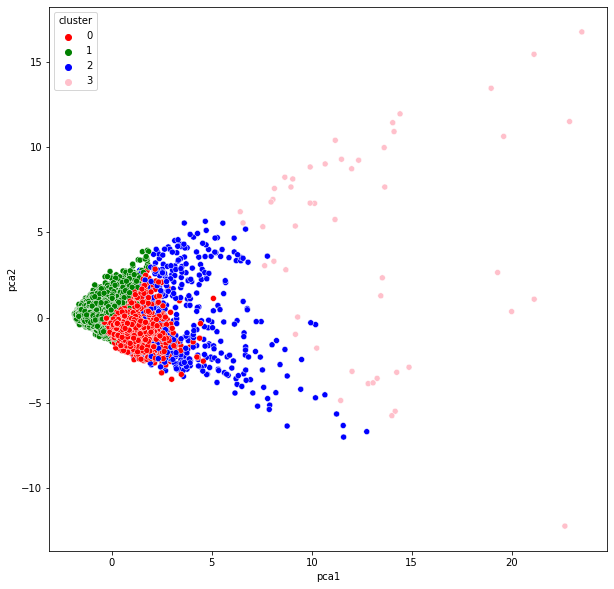

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

CONCLUSÃO:

Esses 4 grupos são mais consistentes do que os 8 grupos feitos antes, usando apenas o PCA, sem aplicar o AUTOENCODER e o PCA juntos

In [ ]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.00,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,0
1761,18.150347,0.454545,119.80,0.00,119.80,0.000000,0.333333,0.000000,0.25,0.000000,0,4,4500.0,297.276499,143.808363,0.333333,12,0
7417,33.880019,0.909091,3421.12,3008.55,412.57,269.619390,0.916667,0.833333,0.25,0.166667,2,28,3500.0,3977.215235,45.434563,1.000000,12,0
3879,39.557369,0.363636,45.65,45.65,0.00,0.000000,0.083333,0.083333,0.00,0.000000,0,1,3000.0,831.294005,237.528270,0.000000,12,0
7415,43.087983,0.571429,133.00,133.00,0.00,0.000000,0.142857,0.142857,0.00,0.000000,0,1,3000.0,189.248952,96.858626,0.000000,7,0


In [ ]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
587,2492.726282,1.0,27957.68,23032.97,4924.71,0.00000,1.0,1.000000,0.916667,0.0,0,70,9000.0,27255.007520,537.372671,1.000000,12,3
1991,1513.075264,1.0,15704.04,12618.86,3085.18,0.00000,1.0,0.916667,0.916667,0.0,0,185,3000.0,14399.703180,310.712671,0.916667,12,3
1190,1893.611922,1.0,22746.81,15795.42,6951.39,0.00000,1.0,1.000000,1.000000,0.0,0,140,18000.0,22558.284570,505.125031,1.000000,12,3
567,3457.086184,1.0,2448.60,0.00,2448.60,0.00000,1.0,0.000000,1.000000,0.0,0,12,1700.0,227.514473,38512.124770,0.000000,12,3
4515,6956.376540,1.0,11500.94,3091.01,8409.93,15133.53213,1.0,1.000000,1.000000,1.0,48,308,14000.0,20122.005450,1617.014574,0.166667,12,3


In [ ]:
df_cluster_ordered.to_excel('/content/gdrive/MyDrive/IA MachineLearning DataSciense/Marketing/cluster_ordereded1.xls')